# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
env = gym.make('Pendulum-v0')

random_seed = 10
env.seed(random_seed)

# from agent import Agent
# agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], 
#               random_seed=random_seed)

/home/arasdar/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


[10]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
env.action_space, env.observation_space

(Box(1,), Box(3,))

In [4]:
action_size = env.action_space.shape[0]
state_size = env.observation_space.shape[0]

### 3. Instantiate DDPG Agent

In [5]:
action_size, state_size

(1, 3)

In [6]:
env.observation_space.low, env.observation_space.high

(array([-1., -1., -8.], dtype=float32), array([1., 1., 8.], dtype=float32))

In [7]:
env.action_space.low, env.action_space.high

(array([-2.], dtype=float32), array([2.], dtype=float32))

In [8]:
from agent5 import Agent

agent = Agent(s_size=state_size, a_size=action_size, random_seed=random_seed)

### 4. Train the Agent with DDPG

In [9]:
from collections import deque
import numpy as np
import time
import torch

n_episodes=1000
# n_steps=1000
# n_learn=10
# learn_every=20
R_goal=30
Rs_deque = deque(maxlen=100)
meanRs = [] # plot

In [10]:
for i_episode in range(n_episodes):
    
    # # Reset Env
    # env_info = env.reset(train_mode=train_mode)[brain_name]       # reset the environment    
    # S = env_info.vector_observations                   # get the current state (for each agent)
    s = env.reset()
    #print(s.shape)

    #Rs = np.zeros(num_agents)                            # initialize the score (for each agent)
    R = 0 # total reward

    #for i_step in range(n_steps):
    while True:
        
        a = agent.act(np.reshape(s, [1, -1])) # a=[-2, 2]
        a *= 2
        #print(a.shape)
        
        # Exploration noise
        # noise = np.random.normal(loc=0, scale=0.1, size=[num_agents, action_size])
        # A += noise
        # A = np.clip(a=A, a_min=-1, a_max=1)

        # env_info = env.step(A)[brain_name]            # send all actions to the environment
        # S2 = env_info.vector_observations          # get next state (for each agent)
        # rewards = env_info.rewards                          # get reward (for each agent)
        # dones = env_info.local_done                         # see if episode finished
        s2, r, done, _ = env.step(np.reshape(a, [-1]))
        #print(s2.shape, r, done)


        # for s, a, reward, s2, done in zip(S, A, rewards, S2, dones):
        #     agent.step(s, a, reward, s2, done) # send actions to the agent
        agent.step(s, a, r, s2, done)

        R += r                           # update the score (for each agent)
        s = s2                                # roll over states to next time step

        # if i_step%learn_every == 0:
        #     for _ in range(n_learn):
        #         agent.start_learn()
        #print(len(agent.memory))
        agent.start_learn()

        # if np.any(dones):                                   # exit loop if episode finished
        #     break
        if done:
            break

    #meanR = np.mean(Rs)
    #Rs_deque.append(meanR)
    Rs_deque.append(R)
    meanR_deque = np.mean(Rs_deque) # print
    meanRs.append(meanR_deque) # plot

    print('\rEpisode {}\tTotal Average Score: {:.2f}'.format(i_episode+1, meanR_deque))  
    if meanR_deque >= R_goal:
        torch.save(agent.g.state_dict(), 'g-pendulum.pth')
        torch.save(agent.d.state_dict(), 'd-pendulum.pth')
        break

Episode 1	Total Average Score: -877.26
Episode 2	Total Average Score: -1364.23
Episode 3	Total Average Score: -1152.01
Episode 4	Total Average Score: -1080.46
Episode 5	Total Average Score: -1179.40
Episode 6	Total Average Score: -1235.93
Episode 7	Total Average Score: -1274.44
Episode 8	Total Average Score: -1295.80
Episode 9	Total Average Score: -1312.86
Episode 10	Total Average Score: -1315.90
Episode 11	Total Average Score: -1281.09
Episode 12	Total Average Score: -1266.63
Episode 13	Total Average Score: -1265.32
Episode 14	Total Average Score: -1283.98
Episode 15	Total Average Score: -1223.66
Episode 16	Total Average Score: -1155.41
Episode 17	Total Average Score: -1094.25
Episode 18	Total Average Score: -1070.16
Episode 19	Total Average Score: -1045.57
Episode 20	Total Average Score: -1031.88
Episode 21	Total Average Score: -999.08
Episode 22	Total Average Score: -975.65
Episode 23	Total Average Score: -944.32
Episode 24	Total Average Score: -915.32
Episode 25	Total Average Score

Episode 202	Total Average Score: -1313.72
Episode 203	Total Average Score: -1314.89
Episode 204	Total Average Score: -1316.83
Episode 205	Total Average Score: -1318.69
Episode 206	Total Average Score: -1327.43
Episode 207	Total Average Score: -1331.84
Episode 208	Total Average Score: -1332.77
Episode 209	Total Average Score: -1338.01
Episode 210	Total Average Score: -1342.26
Episode 211	Total Average Score: -1347.46
Episode 212	Total Average Score: -1348.85
Episode 213	Total Average Score: -1349.43
Episode 214	Total Average Score: -1354.71
Episode 215	Total Average Score: -1358.51
Episode 216	Total Average Score: -1357.44
Episode 217	Total Average Score: -1356.98
Episode 218	Total Average Score: -1373.48
Episode 219	Total Average Score: -1373.84
Episode 220	Total Average Score: -1376.14
Episode 221	Total Average Score: -1376.18
Episode 222	Total Average Score: -1377.53
Episode 223	Total Average Score: -1378.81
Episode 224	Total Average Score: -1378.92
Episode 225	Total Average Score: -

Episode 398	Total Average Score: -1562.18
Episode 399	Total Average Score: -1567.15
Episode 400	Total Average Score: -1567.06
Episode 401	Total Average Score: -1566.65
Episode 402	Total Average Score: -1566.79
Episode 403	Total Average Score: -1568.00
Episode 404	Total Average Score: -1569.47
Episode 405	Total Average Score: -1569.60
Episode 406	Total Average Score: -1570.57
Episode 407	Total Average Score: -1570.41
Episode 408	Total Average Score: -1570.46
Episode 409	Total Average Score: -1569.64
Episode 410	Total Average Score: -1569.95
Episode 411	Total Average Score: -1568.51
Episode 412	Total Average Score: -1568.49
Episode 413	Total Average Score: -1567.94
Episode 414	Total Average Score: -1568.51
Episode 415	Total Average Score: -1567.68
Episode 416	Total Average Score: -1566.77
Episode 417	Total Average Score: -1580.45
Episode 418	Total Average Score: -1581.53
Episode 419	Total Average Score: -1581.11
Episode 420	Total Average Score: -1580.43
Episode 421	Total Average Score: -

Episode 594	Total Average Score: -1586.50
Episode 595	Total Average Score: -1586.45
Episode 596	Total Average Score: -1585.99
Episode 597	Total Average Score: -1586.49
Episode 598	Total Average Score: -1585.80
Episode 599	Total Average Score: -1586.02
Episode 600	Total Average Score: -1586.13
Episode 601	Total Average Score: -1579.16
Episode 602	Total Average Score: -1577.90
Episode 603	Total Average Score: -1584.43
Episode 604	Total Average Score: -1584.72
Episode 605	Total Average Score: -1585.48
Episode 606	Total Average Score: -1585.78
Episode 607	Total Average Score: -1584.75
Episode 608	Total Average Score: -1585.50
Episode 609	Total Average Score: -1584.09
Episode 610	Total Average Score: -1584.45
Episode 611	Total Average Score: -1584.22
Episode 612	Total Average Score: -1585.22
Episode 613	Total Average Score: -1577.10
Episode 614	Total Average Score: -1577.26
Episode 615	Total Average Score: -1578.18
Episode 616	Total Average Score: -1578.19
Episode 617	Total Average Score: -

Episode 790	Total Average Score: -1615.13
Episode 791	Total Average Score: -1615.44
Episode 792	Total Average Score: -1615.27
Episode 793	Total Average Score: -1614.66
Episode 794	Total Average Score: -1615.00
Episode 795	Total Average Score: -1614.63
Episode 796	Total Average Score: -1614.68
Episode 797	Total Average Score: -1615.88
Episode 798	Total Average Score: -1615.75
Episode 799	Total Average Score: -1615.92
Episode 800	Total Average Score: -1615.84
Episode 801	Total Average Score: -1616.00
Episode 802	Total Average Score: -1615.79
Episode 803	Total Average Score: -1615.80
Episode 804	Total Average Score: -1615.46
Episode 805	Total Average Score: -1615.47
Episode 806	Total Average Score: -1615.11
Episode 807	Total Average Score: -1615.68
Episode 808	Total Average Score: -1615.33
Episode 809	Total Average Score: -1615.47
Episode 810	Total Average Score: -1616.10
Episode 811	Total Average Score: -1616.23
Episode 812	Total Average Score: -1615.59
Episode 813	Total Average Score: -

Episode 986	Total Average Score: -1601.51
Episode 987	Total Average Score: -1600.29
Episode 988	Total Average Score: -1599.78
Episode 989	Total Average Score: -1599.64
Episode 990	Total Average Score: -1599.80
Episode 991	Total Average Score: -1600.73
Episode 992	Total Average Score: -1601.34
Episode 993	Total Average Score: -1601.83
Episode 994	Total Average Score: -1601.25
Episode 995	Total Average Score: -1600.47
Episode 996	Total Average Score: -1600.64
Episode 997	Total Average Score: -1600.57
Episode 998	Total Average Score: -1600.06
Episode 999	Total Average Score: -1600.08
Episode 1000	Total Average Score: -1600.25


### 5. Plot the result

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

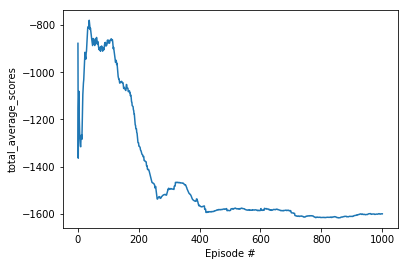

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs)+1), meanRs)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

### 6. Watch the agent running with saved weights

In [15]:
# Load the saved weights into Pytorch model
agent.g.load_state_dict(torch.load('g-pendulum.pth', map_location='cpu'))
agent.d.load_state_dict(torch.load('d-pendulum.pth', map_location='cpu'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
S = env_info.vector_observations                  # get the current states (S) (for each agent)
Rs = np.zeros(num_agents)                          # initialize the total scores (Rs) (for each agent)

while True:
    A = agent.act(S)                        # select actions (A) from loaded model agents
    env_info = env.step(A)[brain_name]           # send all actions (A) to tne environment (env)
    S2 = env_info.vector_observations         # get next states (S2) (for each agent)
    rewards = env_info.rewards                         # get rewards (for each agent)
    dones = env_info.local_done                        # see if the episode is done/finished (terminal)
    Rs += env_info.rewards                         # update the total scores (Rs) (for each agent)
    S = S2                               # roll over current states (S) to next states (S2)
    if np.any(dones):                                  # exit loop if episode is done/finished
        break
print('Average of total scores: {}'.format(np.mean(Rs)))

Total score: 34.055999238789084


When finished, you can close the environment.

In [6]:
env.close()